# PCA

In [10]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np


cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [20]:
print(len(cancer.data[cancer.target==1]))

357


In [23]:
print((cancer.data).shape)

(569, 30)


In [24]:
print((cancer.target).shape)

(569,)


In [27]:
# benign
print(len(cancer.data[cancer.target==1]))

357


In [28]:
# malignant
print(len(cancer.data[cancer.target==0]))

212


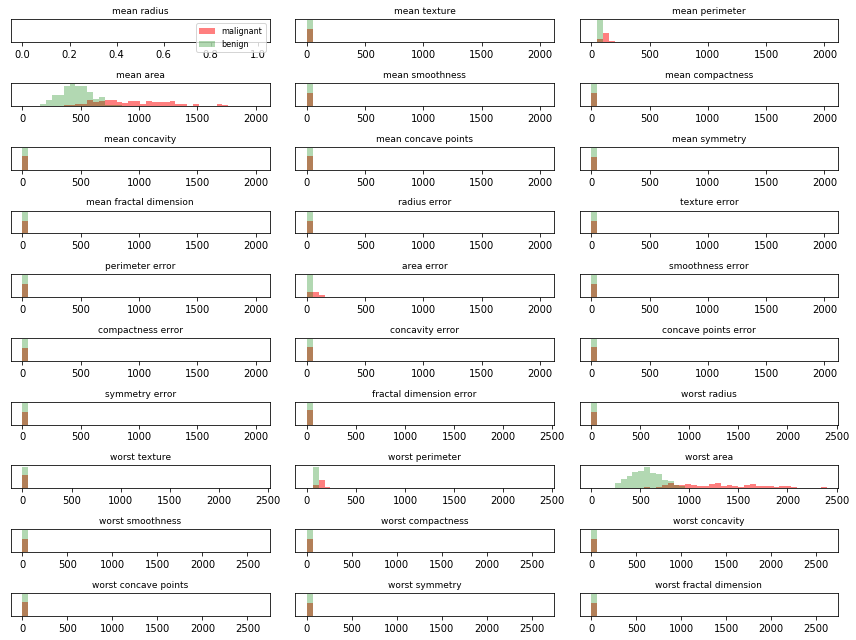

In [36]:
import matplotlib.pyplot as plt

# 3 columns, each containing 10 figures, total 30 features
fig, axes = plt.subplots(10,3, figsize=(12,9))

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

#flat axes with numpy ravel
ax = axes.ravel()


for i in range(30):
    _,bins=np.histogram(cancer.data[:i], bins=40)
    ax[i].hist(malignant[:,i], bins=bins, color='r',alpha=.5)
    ax[i].hist(benign[:,i], bins=bins, color='g', alpha=.3)
    ax[i].set_title(cancer.feature_names[i], fontsize=9)
    ax[i].axes.get_xaxis().set_visible(True)
    ax[i].set_yticks(())
    
ax[0].legend(['malignant', 'benign'], loc='best', fontsize=8)
plt.tight_layout()
plt.show()

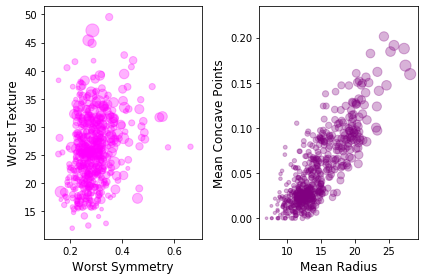

In [39]:
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)# just convert the scikit learn data-set to pandas data-frame.
plt.subplot(1,2,1)#fisrt plot
plt.scatter(cancer_df['worst symmetry'], cancer_df['worst texture'], s=cancer_df['worst area']*0.05, color='magenta', label='check', alpha=0.3)
plt.xlabel('Worst Symmetry',fontsize=12)
plt.ylabel('Worst Texture',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(cancer_df['mean radius'], cancer_df['mean concave points'], s=cancer_df['mean area']*0.05, color='purple', label='check', alpha=0.3)
plt.xlabel('Mean Radius',fontsize=12)
plt.ylabel('Mean Concave Points',fontsize=12)
plt.tight_layout()
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data) # computes mean and SD
X_scaled = scaler.transform(cancer.data) 
print()

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+